 <div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/NotebooksPython101"><img src = "https://ibm.box.com/shared/static/yfe6h4az47ktg2mm9h05wby2n7e8kei3.png" width = 750, align = "center"></a>

<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5> Make Fake Album Cover Game</font></h1>

## Table of Contents
Our goal is to create randomly generated album covers with:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>

<li><a href="#ref1">Learn how to use the function display_cover</a></li>
<li><a href="#ref2">Loading a random page from Wikipedia</a></li>
<li><a href="#ref3">Extracting the Title of the Article</a></li>
<li><a href="#ref4"> Displaying the Album Cover</a></li>


</ol>
<br>
<p></p>
Estimated Time Needed: <strong>60 min</strong>
</div>

<hr>


Inspiration: [Fake Album Covers](https://fakealbumcovers.com/)

#### Import libraries 


In [20]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#### Helper function to superimpose text on image 


In [21]:
def display_cover(top,bottom ):
    """This fucntoin
    """
    import requests
    
    name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) #25pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

## 1) Learn how to use the function display_cover <a id='ref1'></a>

 The function **display_cover**  selects a random image from https://picsum.photos/  and will help us superimpose two strings over the image. The parameter **top** is the string we would like to superimpose on the top of an image.  The parameter bottom is the string we would like to display on the bottom of the image.  The function does not return the image but returns an object of type  Image from the Pillow library; the object represents a PIL image. 

In [4]:
img=display_cover(top='top',bottom='bottom')

To save the image, we use the method **save** . The argument is the file  name of the image  we would like to save in this case 'sample-out.png'

In [5]:
img.save('sample-out.png')

Finely we use **IPythonImage** to read the image file and display the results.


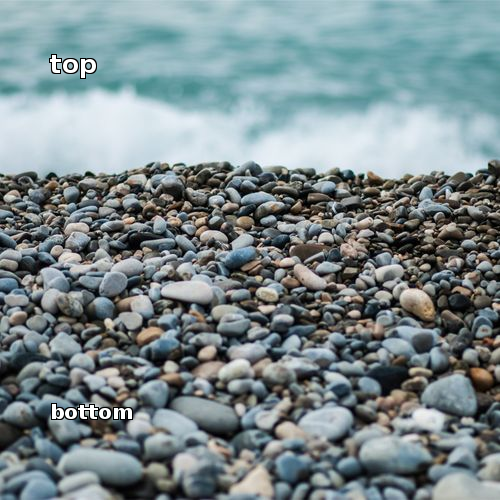

In [6]:
IPythonImage(filename='sample-out.png')

**Question 1)** Use the **display_cover** function to display the image with the name Python on the top and Data Science on the bottom. Save the image as **'sample-out.png'**.

In [22]:
img=display_cover(top='Python',bottom='Data Science')

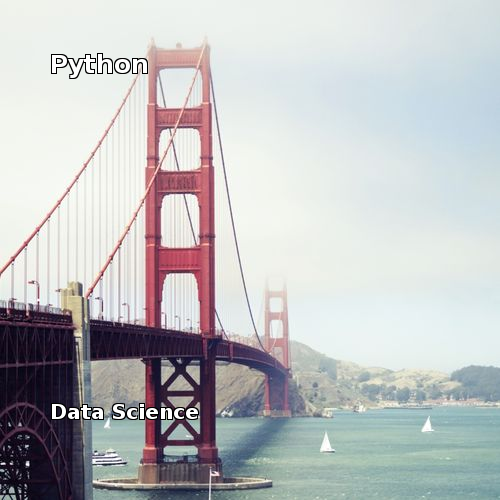

In [23]:
img.save('sample-out.png')
IPythonImage(filename='sample-out.png')


## Part 2: Loading a random page from Wikipedia  <a id='ref2'></a>

 In this project, we will use the request library, we used it in the function **display_cover**, but you should import the library in the next cell.

In [24]:
import requests


 The following is the URL to the  page 

In [25]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

**Question 2)** Get Wikipedia page is converted to a string

 Use the function **get** from the **requests** library to download the Wikipedia page using the **wikipedia_link** as an argument. Assign the object to the variable **raw_random_wikipedia_page**.

In [32]:
raw_random_wikipedia_page=requests.get(wikipedia_link)  


 Use the data attribute **text** to extract the XML as a text file a string and assign the result variable **page**:

In [34]:


page=raw_random_wikipedia_page .text
print(page)


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Shona M. Bell - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Shona_M._Bell","wgTitle":"Shona M. Bell","wgCurRevisionId":882170997,"wgRevisionId":882170997,"wgArticleId":55179132,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles lacking reliable references","Articles lacking reliable references from September 2017","Botanists with author abbreviations","Wikipedia articles with Botanist identifiers","All stub articles","1924 births","2011 deaths","New Zealand paleontologists","New Zealand women scientists","New Zealand scientist stubs"],

# Part 3: Extracting the Title of the Article <a id='ref3'></a>  

 **Question 3 (part 1)**  Use the title of the Wikipedia article as the title of the band. The title of the article is surrounded by the XML node title as follows:  **&lt;title&gt;title - Wikipedia&lt;/title>**
. For example, if the title of the article was Python we would see the following:  **&lt;title&gt;Python - Wikipedia&lt;/title>**. Consider the example where the title of the article is Teenage Mutant Ninja Turtles the result would be:  **&lt;title&gt;Teenage Mutant Ninja Turtles - Wikipedia&lt;/title>**.  The first step is to find the XML node  **&lt;title&gt;** and **&lt;/title&gt;**indicating the start and end of the title. The string function  **find** maybe helpful, you can also use libraries like **xlxml**.

result = page.find(b'<title>')
result1 = page.find(b'</title>')
print(result)
s1 = ""
#print(chr(page[result+1]))
print(result1)
for i in range(result, result1):
    print(chr(page[i]), end = " ")
    s1 = s1 + chr(page[i])
print()

    
##### To extract the name 
#print(s1)
s2 = s1.strip(' - Wikipedia')
s3 = s2.strip('<title>')
#print(s2)
print(s3)

 **Question 3 (part 2)** Next get rid of the term ** - Wikipedia** from the title and assign the result to the **band_title**  For example you can use the function or method **strip** or **replace**. 


 **Question 4)** Repeat the second and third step, to extract the title of a second Wikipedia article but use the result to **album_title**

In [46]:
raw_random_wikipedia_page1 = requests.get(wikipedia_link)
page=raw_random_wikipedia_page1.content

result = page.find(b'<title>')
result1 = page.find(b'</title>')
print(result)
s1 = ""
#print(chr(page[result+1]))
print(result1)
for i in range(result, result1):
    print(chr(page[i]), end = " ")
    s1 = s1 + chr(page[i])
print()

    
##### To extract the name 
#print(s1)
s2 = s1.strip(' - Wikipedia')
s3 = s2.strip('<title>')
#print(s2)
print(s3)

album_title = s3


94
164
< t i t l e > S h e r a t o n   B u e n o s   A i r e s   H o t e l   & a m p ;   C o n v e n t i o n   C e n t e r   -   W i k i p e d i a 
Sheraton Buenos Aires Hotel &amp; Convention Center


 If you did everything correct the following cell should display the album and band name:


In [15]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  <built-in method title of str object at 0x34f2e30>
Your album:  <built-in method title of str object at 0x35488f0>


## Part 4: Displaying the Album Cover  <a id='ref4'></a>

 Use the function **display_cover** to superimpose the band and album title over a random image, assign the result to the variable **album_cover **.

**Question 5)** use the function display_cover  to display the album cover with two random article titles representing the name of the band and the title of the album.

In [47]:
img=display_cover(top=album_title,bottom=band_title)

 Use the method save to save the image as **sample-out.png**:

In [48]:
img.save('sample-out.png')


print("Your band: ", band_title)
print("Your album: ", album_title)


Your band:  Potaszn
Your album:  Sheraton Buenos Aires Hotel &amp; Convention Center


Use the function **IPythonImage** to display the image 


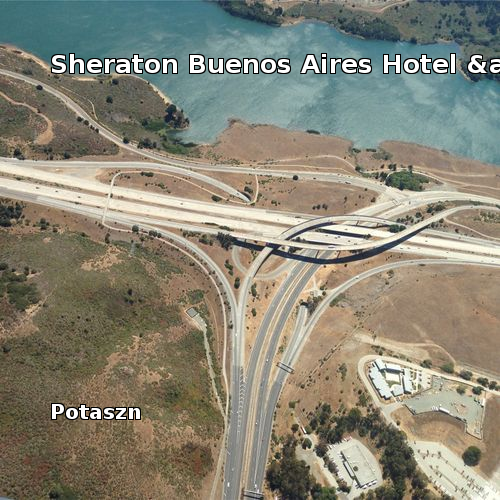

In [49]:
IPythonImage(filename='sample-out.png')

### About the Authors:  
 [James Reeve]( https://www.linkedin.com/in/reevejamesd/) James Reeves is a Software Engineering intern at IBM.



 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.
 

 <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).